In [1]:
%matplotlib inline

# Veri Okunmasi

In [2]:
from obspy import read

In [3]:
import glob, os
dir_path = os.getcwd()

In [4]:
st = read('2014-03-10T05_17_30.008400Z.PB.B045.EH1.SAC',format = 'SAC')
st += read('2014-03-10T05_17_30.008400Z.PB.B045.EH2.SAC',format = 'SAC')
st += read('2014-03-10T05_17_30.008400Z.PB.B045.EHZ.SAC',format = 'SAC')

# Veri Iceriginin Goruntulenmesi

In [6]:
st[0].stats

         network: PB
         station: B045
        location: 
         channel: EH1
       starttime: 2014-03-10T05:17:30.008400Z
         endtime: 2014-03-10T05:23:29.998400Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 36000
           calib: 1.0
         _format: SAC
             sac: AttribDict({u'cmpaz': 159.0, u'dist': 97.685005, u'nzyear': 2014, u'nzjday': 69, u'evla': 40.7235, u'knetwk': u'PB      ', u'user2': 1.0, u'az': 108.721886, u'idep': 5, u'stdp': 217.6, u'evlo': -125.0869, u'iftype': 1, u'nvhdr': 6, u'nevid': 0, u'unused23': 0, u'depmin': -0.061394185, u'internal0': 2.0, u'gcarc': 0.87875646, u'kcmpnm': u'EH1     ', u'nzsec': 30, u'kevnm': u'                ', u'depmen': 1.7436167e-06, u'lpspol': 0, u'stel': 29.4, u'evdp': 6.1, u'depmax': 0.077314705, u'lovrok': 1, u'cmpinc': 90.0, u'mag': 6.9, u'delta': 0.01, u'lcalda': 1, u'e': 359.9904, u'norid': 0, u'nzmsec': 8, u'a': 59.785847, u'khole': u'        ', u'ka': u'IPU0    ', u'b': 0.0004, u'stla': 4

In [7]:
st[1].stats

         network: PB
         station: B045
        location: 
         channel: EH2
       starttime: 2014-03-10T05:17:30.008400Z
         endtime: 2014-03-10T05:23:29.998400Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 36000
           calib: 1.0
         _format: SAC
             sac: AttribDict({u'cmpaz': 249.0, u'dist': 97.685005, u'nzyear': 2014, u'nzjday': 69, u'evla': 40.7235, u'knetwk': u'PB      ', u'user2': 1.0, u'az': 108.721886, u'idep': 5, u'stdp': 217.6, u'evlo': -125.0869, u'iftype': 1, u'nvhdr': 6, u'nevid': 0, u'unused23': 0, u'depmin': -0.060061052, u'internal0': 2.0, u'gcarc': 0.87875646, u'kcmpnm': u'EH2     ', u'nzsec': 30, u'kevnm': u'                ', u'depmen': 2.0825419e-06, u'lpspol': 0, u'stel': 29.4, u'evdp': 6.1, u'depmax': 0.060218245, u'lovrok': 1, u'cmpinc': 90.0, u'mag': 6.9, u'delta': 0.01, u'lcalda': 1, u'e': 359.9904, u'norid': 0, u'nzmsec': 8, u'a': 59.785847, u'khole': u'        ', u'ka': u'IPU0    ', u'b': 0.0004, u'stla': 4

In [8]:
st[2].stats

         network: PB
         station: B045
        location: 
         channel: EHZ
       starttime: 2014-03-10T05:17:30.008400Z
         endtime: 2014-03-10T05:23:29.998400Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 36000
           calib: 1.0
         _format: SAC
             sac: AttribDict({u'cmpaz': 0.0, u'dist': 97.685005, u'nzyear': 2014, u'nzjday': 69, u'evla': 40.7235, u'knetwk': u'PB      ', u'user2': 1.0, u'az': 108.721886, u'idep': 5, u'stdp': 217.6, u'evlo': -125.0869, u'iftype': 1, u'nvhdr': 6, u'nevid': 0, u'unused23': 0, u'depmin': -0.037908245, u'internal0': 2.0, u'gcarc': 0.87875646, u'kcmpnm': u'EHZ     ', u'nzsec': 30, u'kevnm': u'                ', u'depmen': -4.344466e-08, u'lpspol': 0, u'stel': 29.4, u'evdp': 6.1, u'depmax': 0.05203004, u'lovrok': 1, u'cmpinc': 0.0, u'mag': 6.9, u'delta': 0.01, u'lcalda': 1, u'e': 359.9904, u'norid': 0, u'nzmsec': 8, u'a': 59.785847, u'khole': u'        ', u'ka': u'IPU0    ', u'b': 0.0004, u'stla': 40.43

# Deprem Dalgasinin Cizdirilmesi

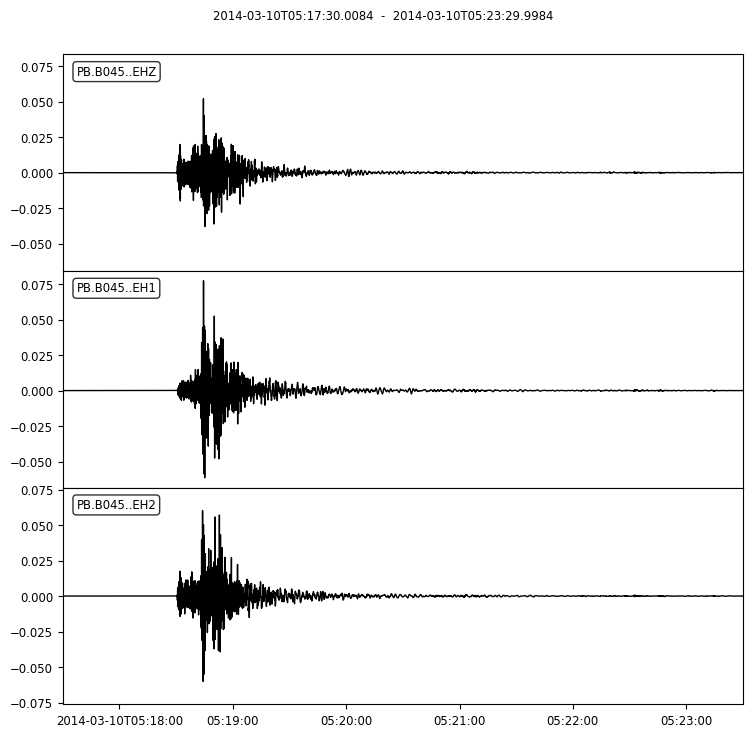

In [9]:
st.plot()

# Filtreleme

/usr/lib64/python2.7/site-packages/obspy/signal/detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


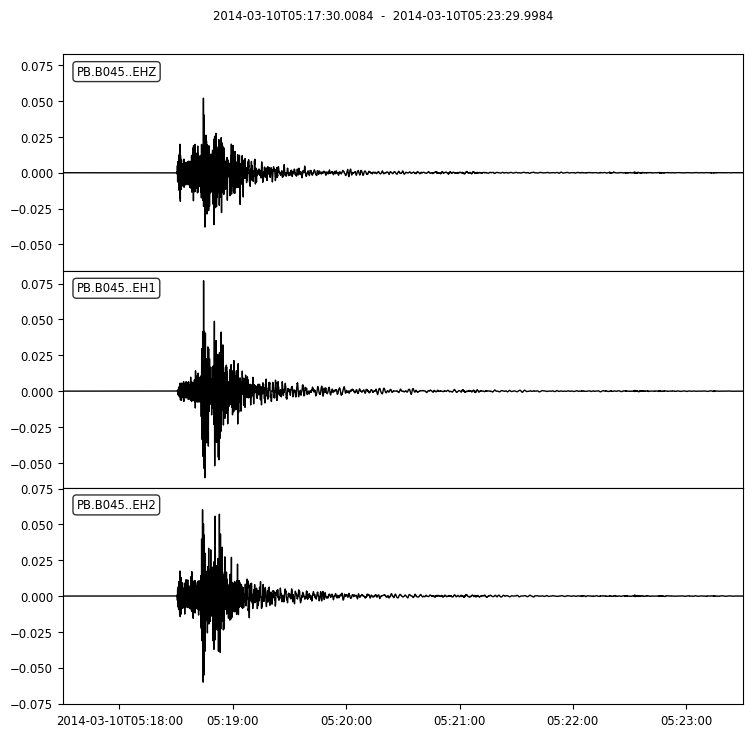

In [10]:
st_filt = st.copy()
st_filt.detrend()
st_filt[0].filter("bandpass", freqmin=0.1, freqmax=10)
st_filt.plot()

# Kesme

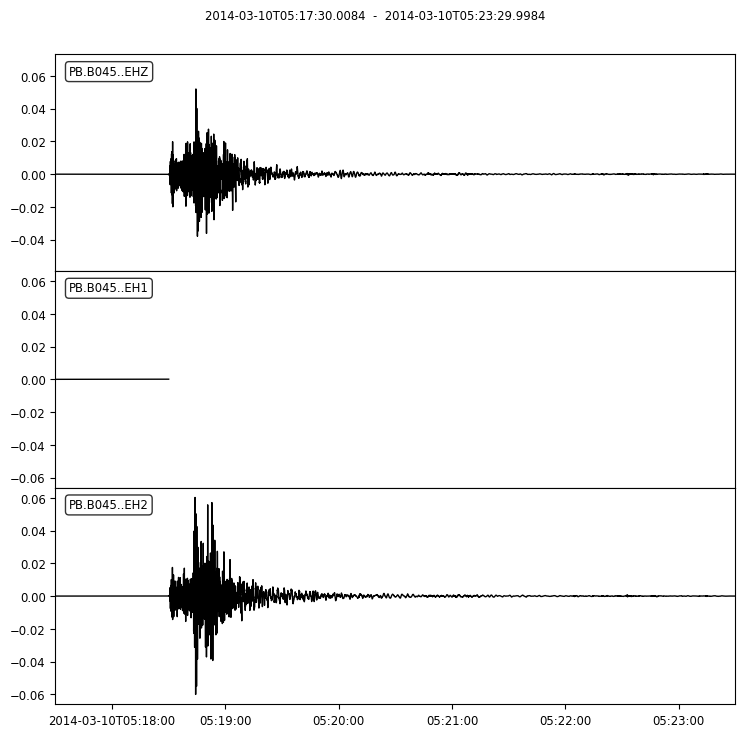

In [11]:
st_kesik0 = st.copy()
st_kesik0[0].trim(st[0].stats.starttime + 0,st[0].stats.starttime + 60)
st_kesik0.plot()

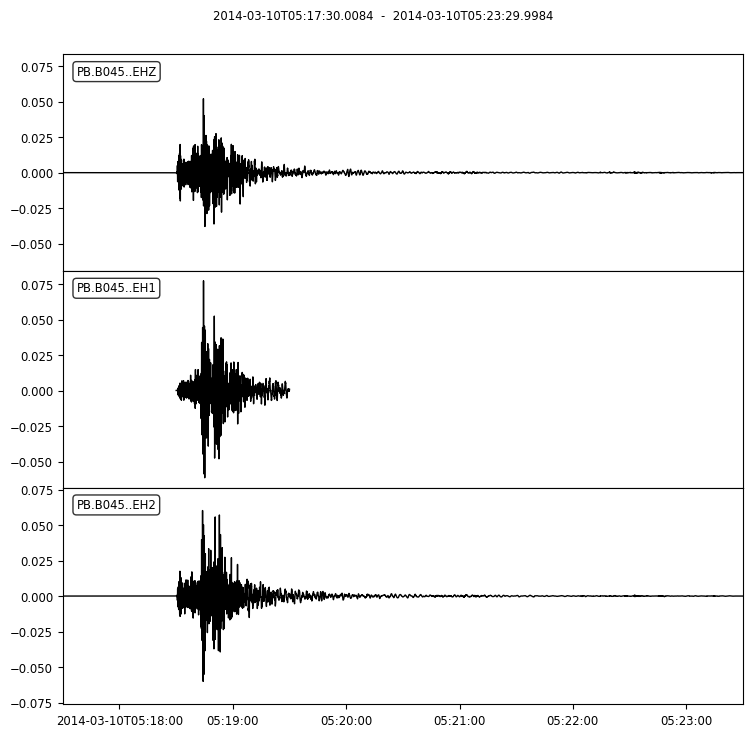

In [12]:
st_kesik1 = st.copy()
st_kesik1[0].trim(st[0].stats.starttime + 60,st[0].stats.starttime + 120)
st_kesik1.plot()

# Birlestirme

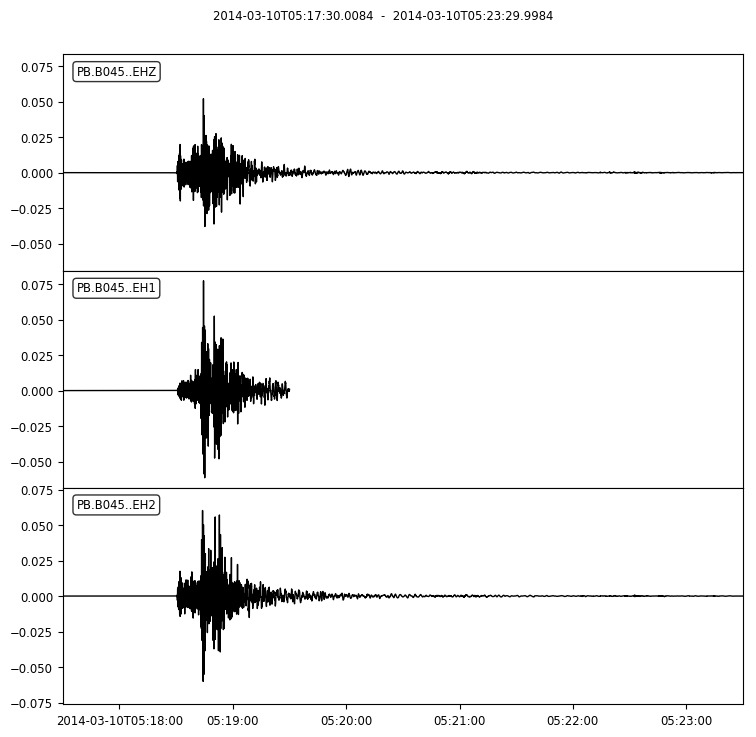

In [13]:
st_birlestik = st_kesik0
st_birlestik += st_kesik1
st_birlestik.merge(method=1,fill_value = 0)
st_birlestik.plot()

# Turev ve Integral Alma

Ivme = cm/s^2

Hiz = cm/s

Yer Degistirme = cm

# Integral Alma

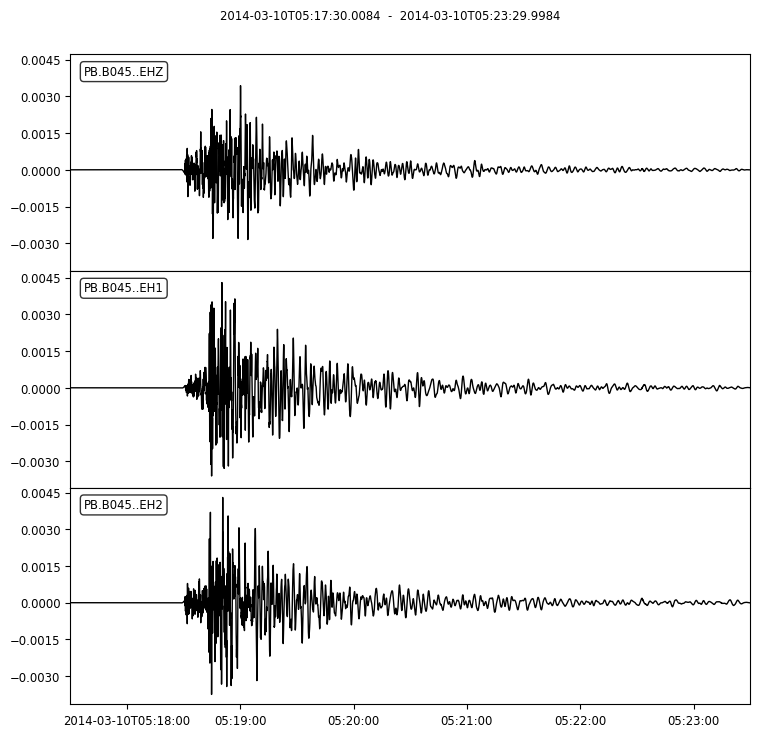

In [14]:
st_hiz = st.copy()
st_hiz.filter("bandpass", freqmin=0.1, freqmax=10)
st_hiz.integrate(method='cumtrapz')
st_hiz.plot()

# Turev Alma

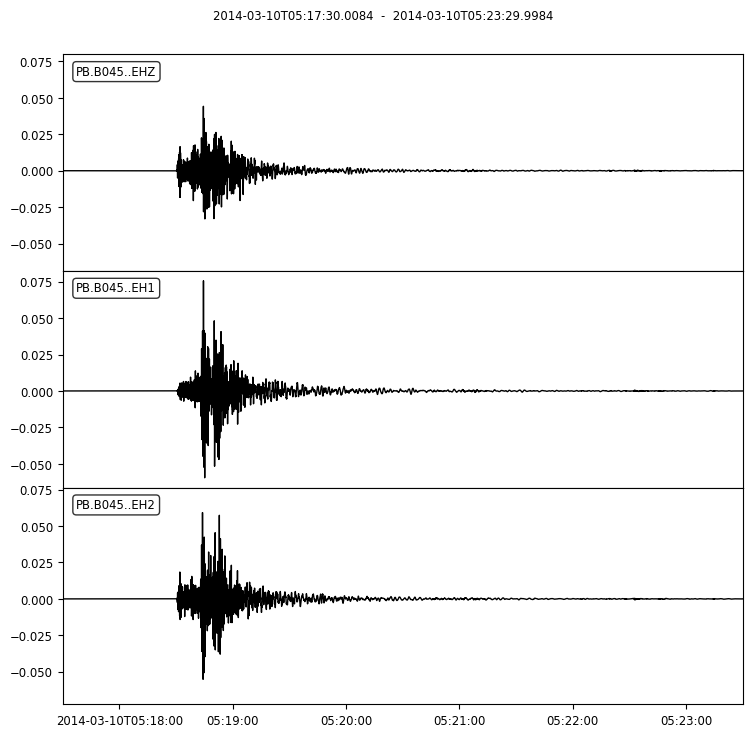

In [15]:
st_ivme = st_hiz.copy()
st_ivme.differentiate(method='gradient')
st_ivme.plot()

# Deprem Ilk Varis Belirlenmesi

In [17]:
from obspy.signal.trigger import plot_trigger, classic_sta_lta

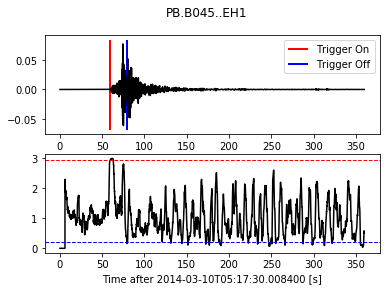

In [18]:
df = st[0].stats.sampling_rate
cft = classic_sta_lta(st[0].data, int(2 * df), int(6 * df))
plot_trigger(st[0], cft, 2.95, 0.2,show=True)

# Spectrogram

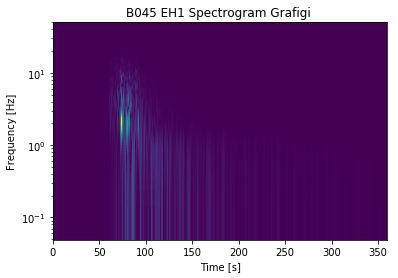

In [19]:
st[0].spectrogram(log=True, title=str(st[0].stats.station) + ' ' + str(st[0].stats.channel) +  ' Spectrogram Grafigi ',show=True)

# Fourier Transformu

In [20]:
import scipy.fftpack
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig

In [21]:
st_alcakgecis = st.copy()
st_alcakgecis[0].filter('lowpass',freq=3, corners=2, zerophase=True)
dt = st[0].stats.delta
npts = st[0].stats.npts

In [22]:
yf = scipy.fftpack.fft(st_alcakgecis[0])
xf = np.linspace(0.0, 1.0/(2.0*dt), npts/2)

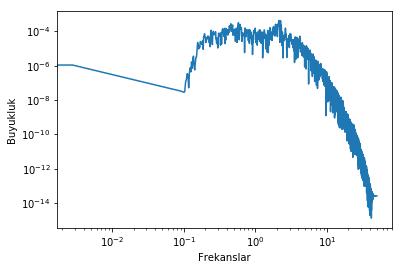

In [23]:
fig, ax = plt.subplots()
ax.plot(xf, 2.0/npts * np.abs(yf[:npts//2]))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frekanslar')
plt.ylabel('Buyukluk')
fname = str(st[0].stats.starttime.year) + str(st[0].stats.starttime.month) + str(st[0].stats.starttime.day) + '_fft.jpg'
savefig(fname, dpi=50, bbox_inches='tight')
plt.show()

# Kuzey-Dogu Istasyonlarini Radyal ve Transverse'e Dondurme

In [24]:
from obspy.signal.rotate import rotate_ne_rt

Baslangic Bitis Farkinin Ortadan Kaldirilmasi

In [25]:
t_bas_fark = st[0].stats.starttime - st[1].stats.starttime
t_son_fark = st[0].stats.endtime - st[1].stats.endtime
if t_bas_fark < 0:
  st[0].trim(st[0].stats.starttime,st[1].stats.endtime)
elif t_bas_fark > 0:
  st[1].trim(st[0].stats.starttime,st[1].stats.endtime)
if t_son_fark < 0:
  st[1].trim(st[1].stats.starttime,st[0].stats.endtime)
elif t_son_fark > 0:
  st[0].trim(st[0].stats.starttime,st[1].stats.endtime)

In [26]:
trace_kuzey = st[0].copy()
trace_dogu = st[1].copy()
rt = rotate_ne_rt(trace_kuzey.data,trace_dogu.data, st[0].stats.sac.baz)

Cizdirme

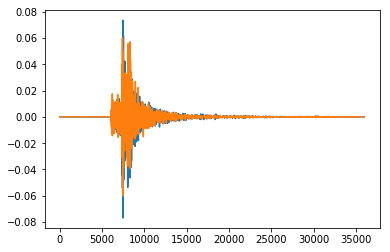

In [27]:
plt.plot(rt[1])
plt.plot(st[1])
plt.show()

# Beach Ball Cizimi

In [28]:
from obspy.imaging.beachball import beachball

Gosterim: Strike,Dip,Rake

In [29]:
mt = [228, 79, -2]

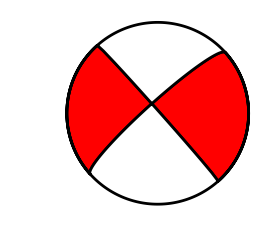

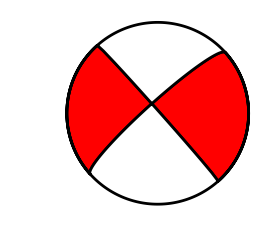

In [30]:
beachball(mt, size=200, linewidth=2, facecolor='r')

# Harita Cizimi

In [31]:
from mpl_toolkits.basemap import Basemap
from obspy.imaging.beachball import beach

/usr/lib64/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1699: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/usr/lib64/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3224: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3233: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/lib64/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3262: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib64/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3271: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
 

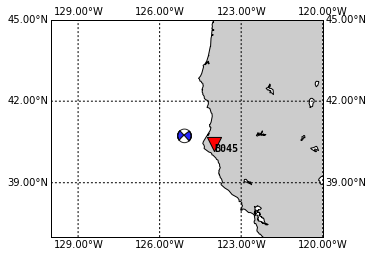

In [32]:
# Harita Altilgi
m = Basemap(projection='cyl', llcrnrlon = -130, llcrnrlat = 37, urcrnrlon = -120, urcrnrlat = 45,
            lat_0=42, lon_0=-120, resolution='i')
# Enlem Boylam Cizgileri
m.drawcoastlines()
m.fillcontinents()
m.drawparallels(np.arange(-90., 90., 3), labels=[1, 1, 0, 0], fmt="%.2f",dashes=[2, 2])
m.drawmeridians(np.arange(-180., 180., 3.), labels=[0, 0, 1, 1], fmt="%.2f",dashes=[2, 2])
m.drawmapboundary()
# Istasyon
lons = [st[0].stats.sac.stlo]
lats = [st[0].stats.sac.stla]
names = [str(st[0].stats.station)]
x, y = m(lons, lats)
m.scatter(x, y, 200, color="r", marker="v", edgecolor="k", zorder=3)
for i in range(len(names)):
    plt.text(x[i], y[i], names[i], va="top", family="monospace", weight="bold")
m.plot(x, y, 'vk', markersize=5)
# Beach Ball
x, y = m(st[0].stats.sac.evlo, st[0].stats.sac.evla)
focmecs = [228, 79, -2]
ax = plt.gca()
b = beach(focmecs, xy=(x, y), width=0.5, linewidth=1, alpha=0.85)
b.set_zorder(10)
ax.add_collection(b)
plt.show()

# Alet Cevabini Silme

Dosya icindekileri listeleme

In [33]:
cwd = os.getcwd()
folders = glob.glob(cwd + '/' + '2014-03-10_MW6.9_Off_Coast_Of_Northern_California.743736')

Yeni SAC Dosyasi Kaydecek Fonksiyon

In [34]:
def sacwriter(time, stanw, stanm, stach, tr):
    folder = os.getcwd() + '/rrsac/'
    tr.write(folder + time + '.' + stanw + '.' +  stanm + '.' + stach + '.SAC', format="SAC")
    st2 = read(folder + time + '.' + stanw + '.' + stanm + '.' + stach + '.SAC')
    st2[0].write(folder + time + '.' + stanw + '.' + stanm + '.' + stach + '.SAC', format="SAC")
    return

In [35]:
for folder in folders:
  os.chdir(folder)
  # Alet Cevabi Dosyalarini Listeleme
  resps = glob.glob('RESP.*')
  # SAC Dosyalarini Listeleme
  sacs = glob.glob('*.SAC')
  for resp in resps:
    # SAC Dosyalari ile Alet Cevap Dosyalarini Eslestirme
    for sac in sacs:
      st = read(sac)
      STNW = st[0].stats.network
      STNM = st[0].stats.station
      STCH = st[0].stats.channel
      time = str(st[0].stats.starttime)
      # UNITS: ACC - Ivme, VEL - Hiz, DISP - Yer Degistirme
      seedresp = {'filename': resp, 'units': 'ACC'}
      if resp == 'RESP.' + STNW + '.' + STNM + '..' + STCH:
        print(resp,sac)
        pre_filt = [0.1, 0.5, 40, 50]
        st.simulate(paz_remove=None, pre_filt=pre_filt, seedresp=seedresp)
        # Yeni Dosyalari Kaydetme
        sacwriter(time, STNW, STNM, STCH, st[0])

('RESP.PB.B932..EH1', '2014.069.05.17.28.0084.PB.B932..EH1.M.SAC')
('RESP.PB.B047..EHZ', '2014.069.05.17.29.0084.PB.B047..EHZ.M.SAC')
('RESP.PB.B932..EHZ', '2014.069.05.17.28.0084.PB.B932..EHZ.M.SAC')
('RESP.PB.B047..EH1', '2014.069.05.17.29.0084.PB.B047..EH1.M.SAC')
('RESP.PB.B045..EH2', '2014.069.05.17.30.0084.PB.B045..EH2.M.SAC')
('RESP.PB.B045..EH1', '2014.069.05.17.30.0084.PB.B045..EH1.M.SAC')
('RESP.PB.B045..EHZ', '2014.069.05.17.30.0084.PB.B045..EHZ.M.SAC')
('RESP.PB.B046..EH1', '2014.069.05.17.27.0084.PB.B046..EH1.M.SAC')
('RESP.PB.B932..EH2', '2014.069.05.17.28.0084.PB.B932..EH2.M.SAC')
('RESP.PB.B046..EH2', '2014.069.05.17.27.0084.PB.B046..EH2.M.SAC')
('RESP.PB.B046..EHZ', '2014.069.05.17.27.0084.PB.B046..EHZ.M.SAC')
('RESP.PB.B047..EH2', '2014.069.05.17.29.0084.PB.B047..EH2.M.SAC')


# Toplu Deprem Indirme

In [37]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
client = Client()
os.chdir(dir_path)

In [38]:
def makedir(dirname):
  try:
    os.makedirs(dirname)
  except:
    pass

In [39]:
starttime = UTCDateTime("2018-08-13")
endtime = UTCDateTime("2018-09-13")

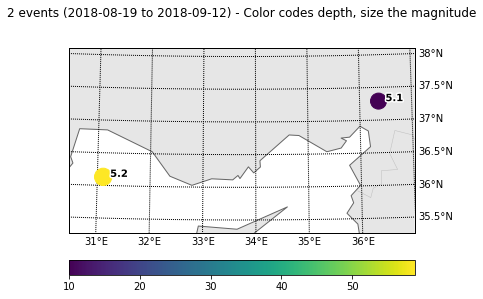

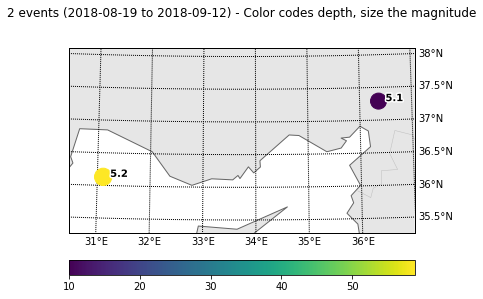

In [40]:
cat = client.get_events(starttime=starttime, endtime=endtime,minlatitude = 36, maxlatitude = 42, minlongitude = 26, maxlongitude = 45, minmagnitude=5,maxdepth=500)
cat.plot('local')

In [41]:
for i, event in enumerate(cat):
  # Yil, ay, gun, saat, dakika, saniye
  t = str(cat[i].origins[0].time)
  time = t[0:19]
  eventname = cat[i].event_descriptions[0].text + time
  # Bosluklari nokta ile dolduruyoruz
  eventname = str(eventname)
  a = eventname.replace(" ", "")
  b = a.replace('.','')
  event_dir = dir_path + '/event'
  makedir(event_dir)
  cwd = dir_path
  completeName = dir_path + '/event/'
  cat[i].write(completeName + b + '.xml', "QUAKEML")

In [45]:
from obspy import read_events
from obspy.clients.fdsn.mass_downloader import (CircularDomain, MassDownloader,
                                                Restrictions, RectangularDomain)

In [46]:
def download(eqname, t0, lat, lon, min_length=360):
    domain = RectangularDomain(36, 42, 26, 45)

    restrictions = Restrictions(starttime=t0,endtime=t0+min_length,chunklength_in_sec=60*7,network="*", station="*", location="", channel="BH*",
        reject_channels_with_gaps=True,minimum_length=0.0,minimum_interstation_distance_in_m=100.0)

    waveform_dir = "{}/waveforms".format(eqname)
    stationxml_dir = "{}/stations".format(eqname)
    makedir(waveform_dir)
    makedir(stationxml_dir)

    mdl = MassDownloader(providers=["http://eida.koeri.boun.edu.tr:8080"])
    mdl.download(domain, restrictions,
                 mseed_storage=waveform_dir,
                 stationxml_storage=stationxml_dir)

In [47]:
path = (dir_path +'/event/')
xmls = os.listdir(path)

In [ ]:
for filename in xmls:
  os.chdir(path)
  eqname, _ = os.path.split(filename)[1].split(".")
  cat = read_events(filename)
  event = cat[0]
  origin = event.preferred_origin()
  download(eqname, origin.time, origin.latitude, origin.longitude)

[2018-09-15 13:29:35,929] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for http://eida.koeri.boun.edu.tr:8080.
[2018-09-15 13:29:36,262] - obspy.clients.fdsn.mass_downloader - INFO: Successfully initialized 1 client(s): http://eida.koeri.boun.edu.tr:8080.
[2018-09-15 13:29:36,264] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 0
[2018-09-15 13:29:36,266] - obspy.clients.fdsn.mass_downloader - INFO: Client 'http://eida.koeri.boun.edu.tr:8080' - Requesting unreliable availability.
[2018-09-15 13:29:37,093] - obspy.clients.fdsn.mass_downloader - INFO: Client 'http://eida.koeri.boun.edu.tr:8080' - Successfully requested availability (0.83 seconds)
[2018-09-15 13:29:37,217] - obspy.clients.fdsn.mass_downloader - INFO: Client 'http://eida.koeri.boun.edu.tr:8080' - Found 130 stations (390 channels).
[2018-09-15 13:29:37,220] - obspy.clients.fdsn.mass_downloader - INFO: Client 'http://eida.koeri.boun.edu.tr:8080' - Will attempt 

[2018-09-15 13:30:28,316] - obspy.clients.fdsn.mass_downloader - INFO: Client 'http://eida.koeri.boun.edu.tr:8080' - Successfully downloaded 'TURKEY2018-08-19T15:22:14/stations/KO.LADK.xml'.
[2018-09-15 13:30:30,817] - obspy.clients.fdsn.mass_downloader - INFO: Client 'http://eida.koeri.boun.edu.tr:8080' - Successfully downloaded 'TURKEY2018-08-19T15:22:14/stations/KO.CANT.xml'.
[2018-09-15 13:30:30,915] - obspy.clients.fdsn.mass_downloader - INFO: Client 'http://eida.koeri.boun.edu.tr:8080' - Successfully downloaded 'TURKEY2018-08-19T15:22:14/stations/KO.ELL.xml'.
[2018-09-15 13:30:30,989] - obspy.clients.fdsn.mass_downloader - INFO: Client 'http://eida.koeri.boun.edu.tr:8080' - Successfully downloaded 'TURKEY2018-08-19T15:22:14/stations/KO.DYBB.xml'.
[2018-09-15 13:30:33,824] - obspy.clients.fdsn.mass_downloader - INFO: Client 'http://eida.koeri.boun.edu.tr:8080' - Successfully downloaded 'TURKEY2018-08-19T15:22:14/stations/KO.SHUT.xml'.
[2018-09-15 13:30:33,919] - obspy.clients.fdsn

[2018-09-15 13:31:53,350] - obspy.clients.fdsn.mass_downloader - INFO: Client 'http://eida.koeri.boun.edu.tr:8080' - Successfully downloaded 21 channels (of 50)
